In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
sample_data = pd.read_csv('abc.csv', thousands=",")

In [4]:
sample_data

,Date,Price,Open,High,Low,Vol.,Change %,Close
0,"Dec 09, 2021",47776.0,50477.6,50790.2,47525.4,53.58K,-5.35%,50596.6
1,"Dec 08, 2021",50473.9,50596.6,51204.7,48700.7,55.59K,-0.24%,50547.4
2,"Dec 07, 2021",50595.2,50547.4,51918.6,50070.9,56.29K,0.07%,49412.1
3,"Dec 06, 2021",50562.1,49412.1,50913.3,47237.9,89.68K,2.34%,49196.4
4,"Dec 05, 2021",49405.5,49196.4,49689.3,47797.8,72.03K,0.43%,53620.7
...,...,...,...,...,...,...,...,...
3260,"Jan 05, 2013",13.4,13.5,13.6,13.3,21.33K,-0.44%,13.4
3261,"Jan 04, 2013",13.5,13.4,13.5,13.3,29.64K,0.75%,13.3
3262,"Jan 03, 2013",13.4,13.3,13.5,13.3,18.03K,0.90%,13.3
3263,"Jan 02, 2013",13.3,13.3,13.4,13.2,17.97K,0.00%,13.5


In [5]:
sample_data = sample_data.set_index(pd.DatetimeIndex(sample_data['Date'].values)) #setting index as date as we make change in order to the date
sample_data #after chaging the base index)

,Date,Price,Open,High,Low,Vol.,Change %,Close
2021-12-09,"Dec 09, 2021",47776.0,50477.6,50790.2,47525.4,53.58K,-5.35%,50596.6
2021-12-08,"Dec 08, 2021",50473.9,50596.6,51204.7,48700.7,55.59K,-0.24%,50547.4
2021-12-07,"Dec 07, 2021",50595.2,50547.4,51918.6,50070.9,56.29K,0.07%,49412.1
2021-12-06,"Dec 06, 2021",50562.1,49412.1,50913.3,47237.9,89.68K,2.34%,49196.4
2021-12-05,"Dec 05, 2021",49405.5,49196.4,49689.3,47797.8,72.03K,0.43%,53620.7
...,...,...,...,...,...,...,...,...
2013-01-05,"Jan 05, 2013",13.4,13.5,13.6,13.3,21.33K,-0.44%,13.4
2013-01-04,"Jan 04, 2013",13.5,13.4,13.5,13.3,29.64K,0.75%,13.3
2013-01-03,"Jan 03, 2013",13.4,13.3,13.5,13.3,18.03K,0.90%,13.3
2013-01-02,"Jan 02, 2013",13.3,13.3,13.4,13.2,17.97K,0.00%,13.5


In [6]:
print(sample_data.dtypes)

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
Close       float64
dtype: object


In [7]:
sample_data['Price']= sample_data['Price'].astype(float)
sample_data['Open']= sample_data['Open'].astype(float)
sample_data['High']= sample_data['High'].astype(float)
sample_data['Low']= sample_data['Low'].astype(float)
#sample_data['Close']= sample_data['Close'].astype(float)

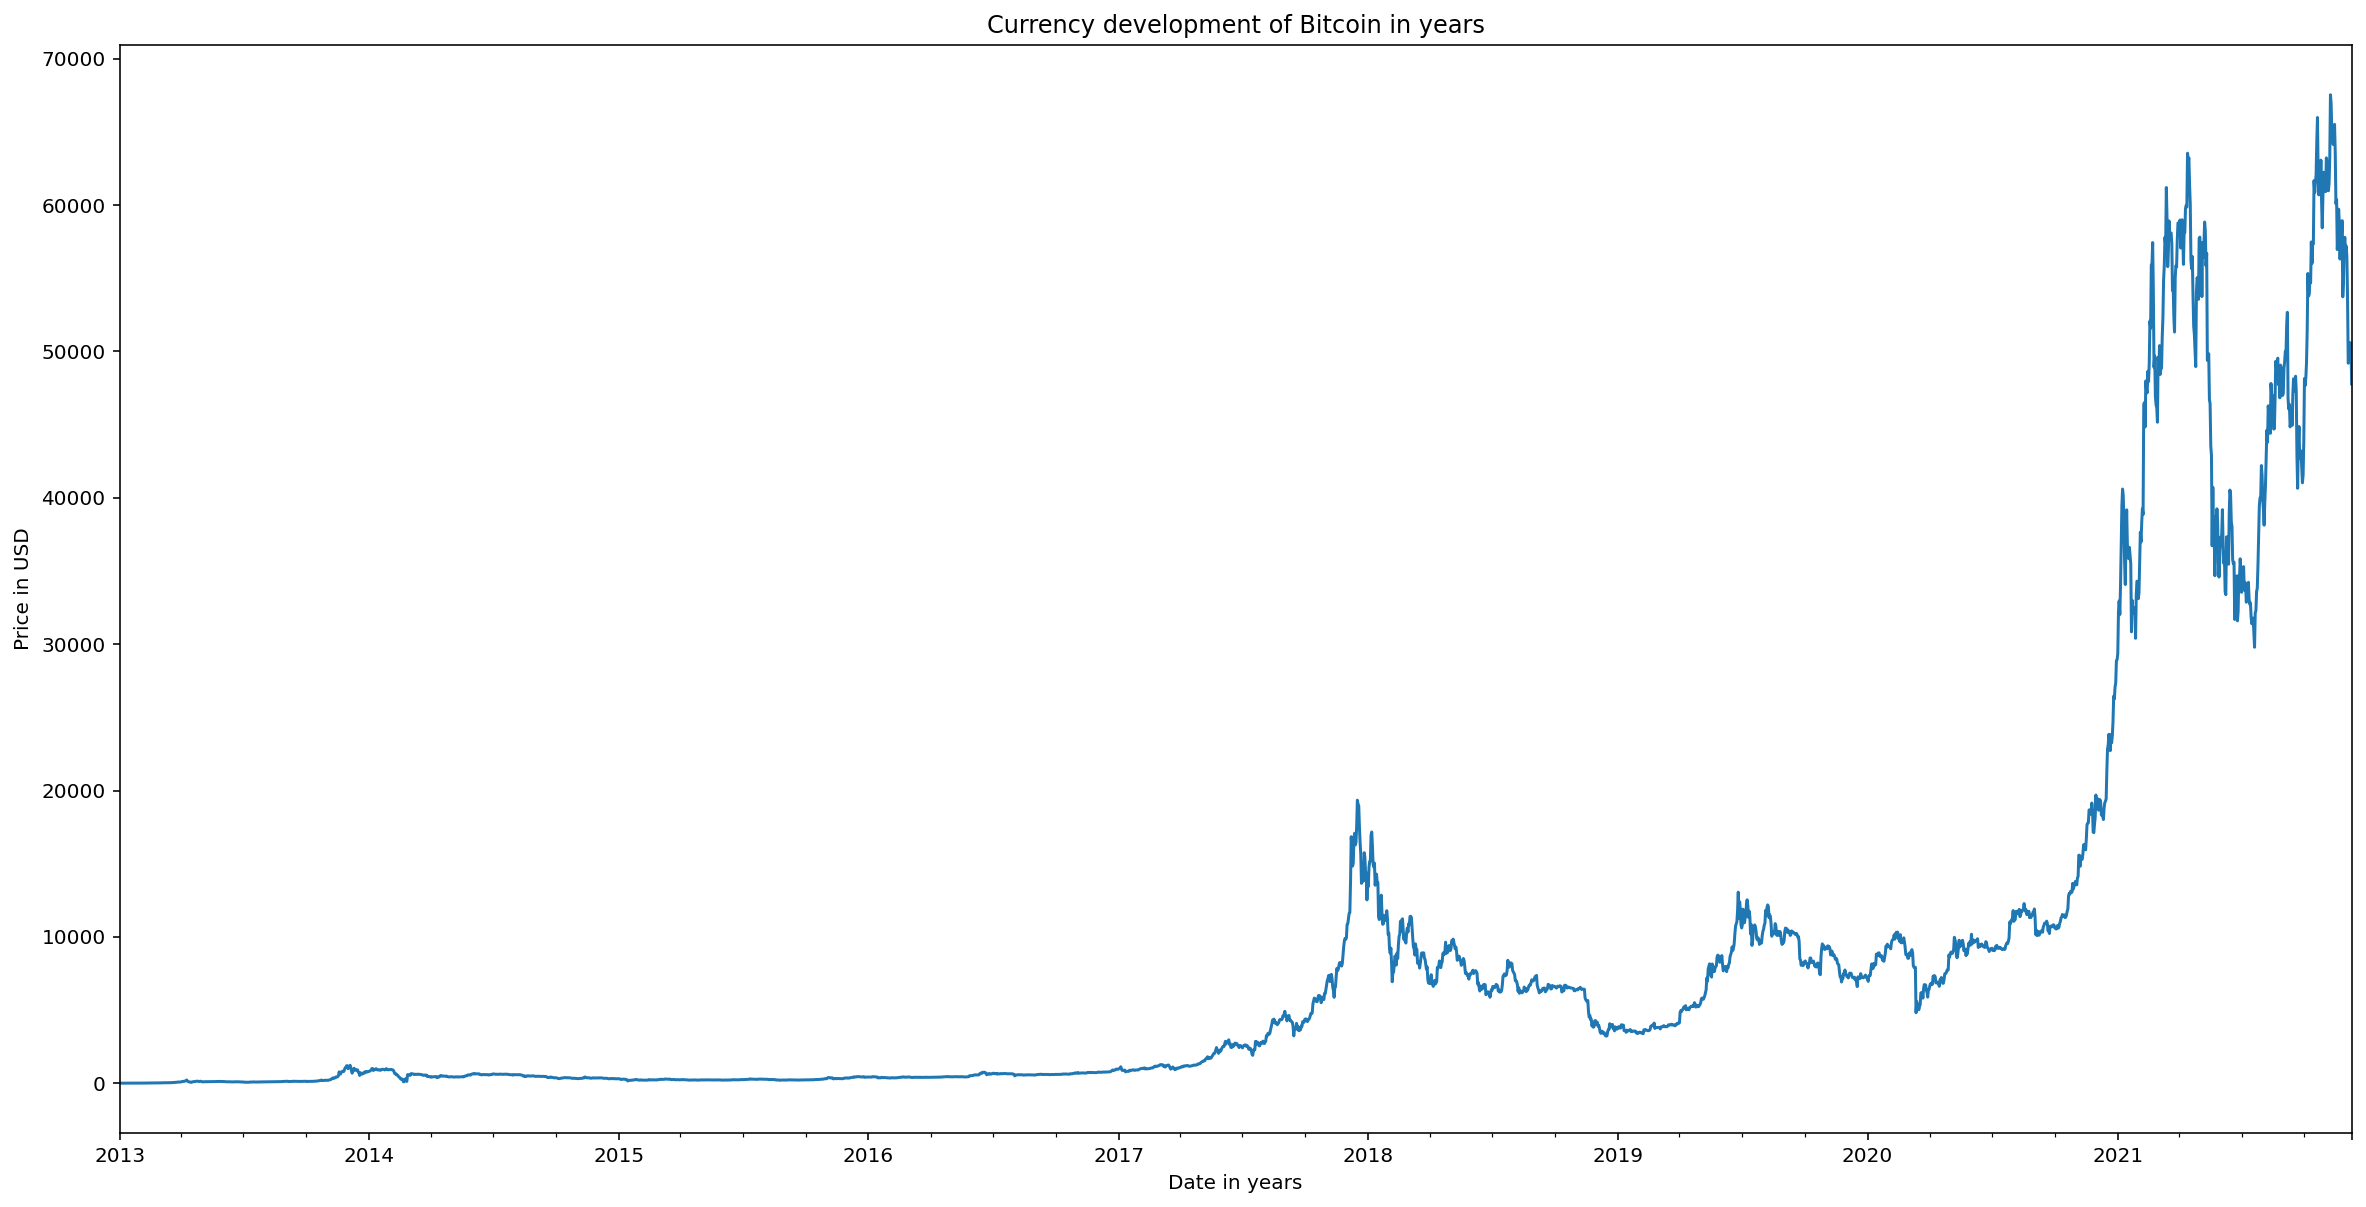

In [8]:
# Development of Bitcoin currency from 2012 - 2021
%config InlineBackend.figure_format ='retina'
sample_data.Price.plot(figsize=(20,10))

plt.title('Currency development of Bitcoin in years') 
plt.ylabel('Price in USD') 
plt.xlabel('Date in years')
plt.show()

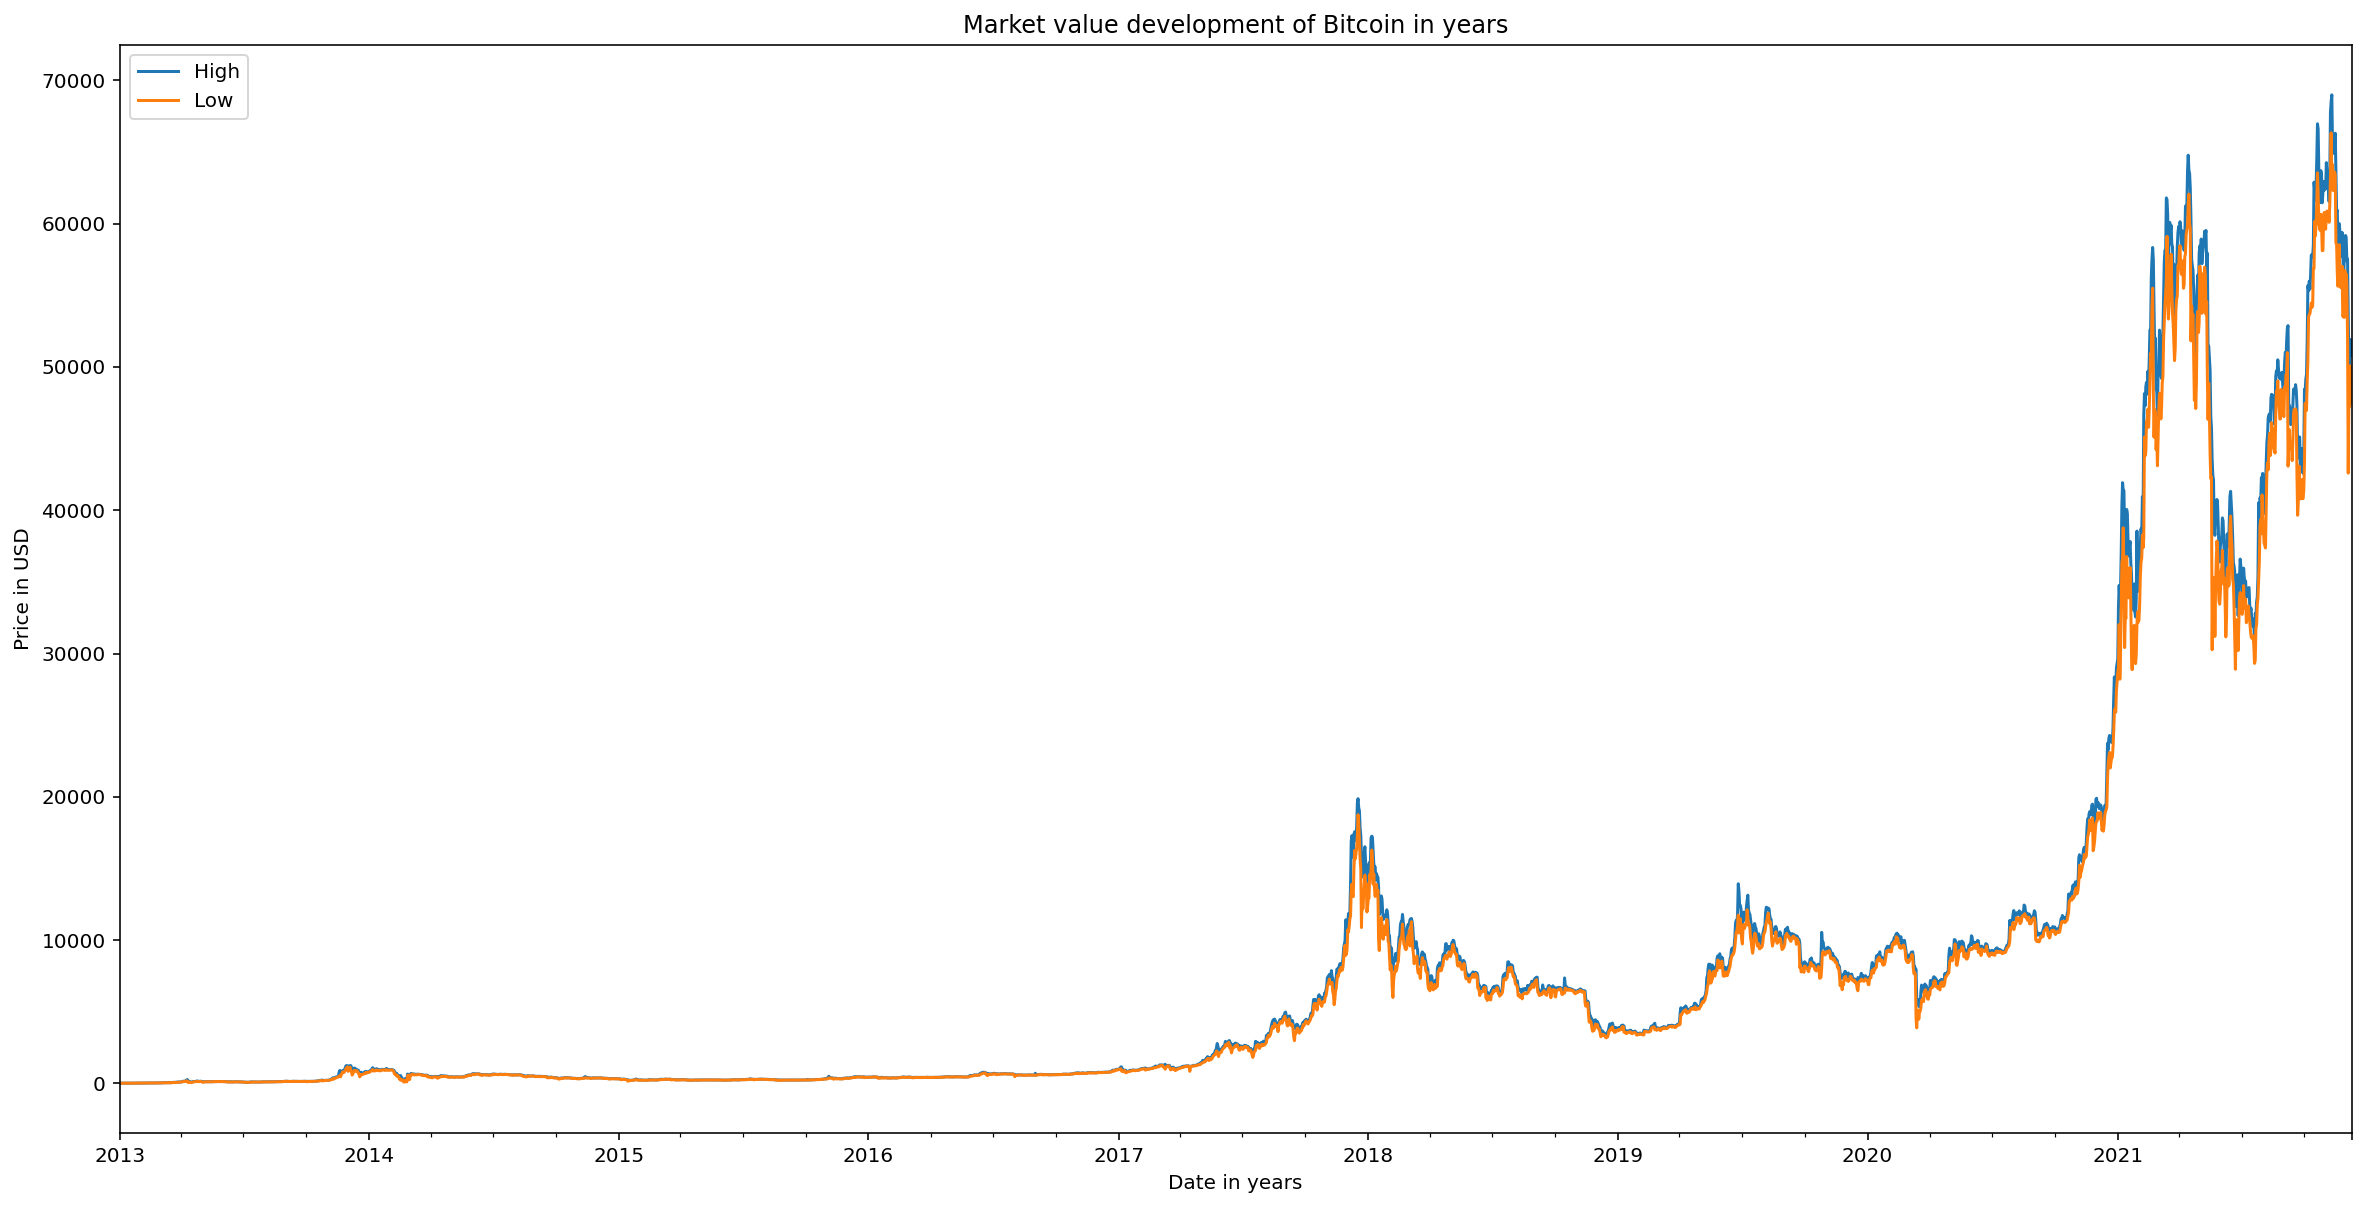

In [9]:
# Development of Bitcoin currency from 2012 - 2021 with daily price fluctuations
%config InlineBackend.figure_format ='retina'
sample_data.High.plot(figsize=(20,10))
sample_data.Low.plot(figsize=(20,10))

plt.title('Market value development of Bitcoin in years') 
plt.ylabel('Price in USD') 
plt.xlabel('Date in years') 
plt.legend(["High", "Low"])
plt.show()

In [10]:
import numpy as np

period = 14

# Differenz Close aktueller Tag zu Vortag steigend / fallend

# for increase
increase = pd.DataFrame(sample_data['Close'])
increase = increase[::-1]
increase = increase.diff()
increase = increase[::-1]
increase[increase < 0] = 0


# for decrease
decrease = pd.DataFrame(sample_data['Close'])
decrease = decrease[::-1]
decrease = decrease.diff()
decrease = decrease[::-1]
decrease[decrease > 0] = 0
decrease = decrease.abs()

# rolling arithmetic average increase
avgIncrease = increase[::-1]
avgIncrease = avgIncrease.rolling(window=period).mean()
avgIncrease = avgIncrease[::-1]

# rolling arithmetic average decrease
avgDecrease = decrease[::-1]
avgDecrease = avgDecrease.rolling(window=period).mean()
avgDecrease = avgDecrease[::-1]

In [11]:
#create new table & show updated sample data

sample_data['Increases'] = increase
sample_data['Decreases'] = decrease
sample_data['Average Increase'] = avgIncrease
sample_data['Average Decrease'] = avgDecrease

sample_data

,Date,Price,Open,High,Low,Vol.,Change %,Close,Increases,Decreases,Average Increase,Average Decrease
2021-12-09,"Dec 09, 2021",47776.0,50477.6,50790.2,47525.4,53.58K,-5.35%,50596.6,49.2,0.0,538.178571,1035.521429
2021-12-08,"Dec 08, 2021",50473.9,50596.6,51204.7,48700.7,55.59K,-0.24%,50547.4,1135.3,0.0,624.278571,1035.521429
2021-12-07,"Dec 07, 2021",50595.2,50547.4,51918.6,50070.9,56.29K,0.07%,49412.1,215.7,0.0,543.185714,1208.014286
2021-12-06,"Dec 06, 2021",50562.1,49412.1,50913.3,47237.9,89.68K,2.34%,49196.4,0.0,4424.3,527.778571,1279.750000
2021-12-05,"Dec 05, 2021",49405.5,49196.4,49689.3,47797.8,72.03K,0.43%,53620.7,0.0,2874.5,645.150000,963.728571
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,"Jan 05, 2013",13.4,13.5,13.6,13.3,21.33K,-0.44%,13.4,0.1,0.0,NaN,NaN
2013-01-04,"Jan 04, 2013",13.5,13.4,13.5,13.3,29.64K,0.75%,13.3,0.0,0.0,NaN,NaN
2013-01-03,"Jan 03, 2013",13.4,13.3,13.5,13.3,18.03K,0.90%,13.3,0.0,0.2,NaN,NaN
2013-01-02,"Jan 02, 2013",13.3,13.3,13.4,13.2,17.97K,0.00%,13.5,0.0,0.0,NaN,NaN


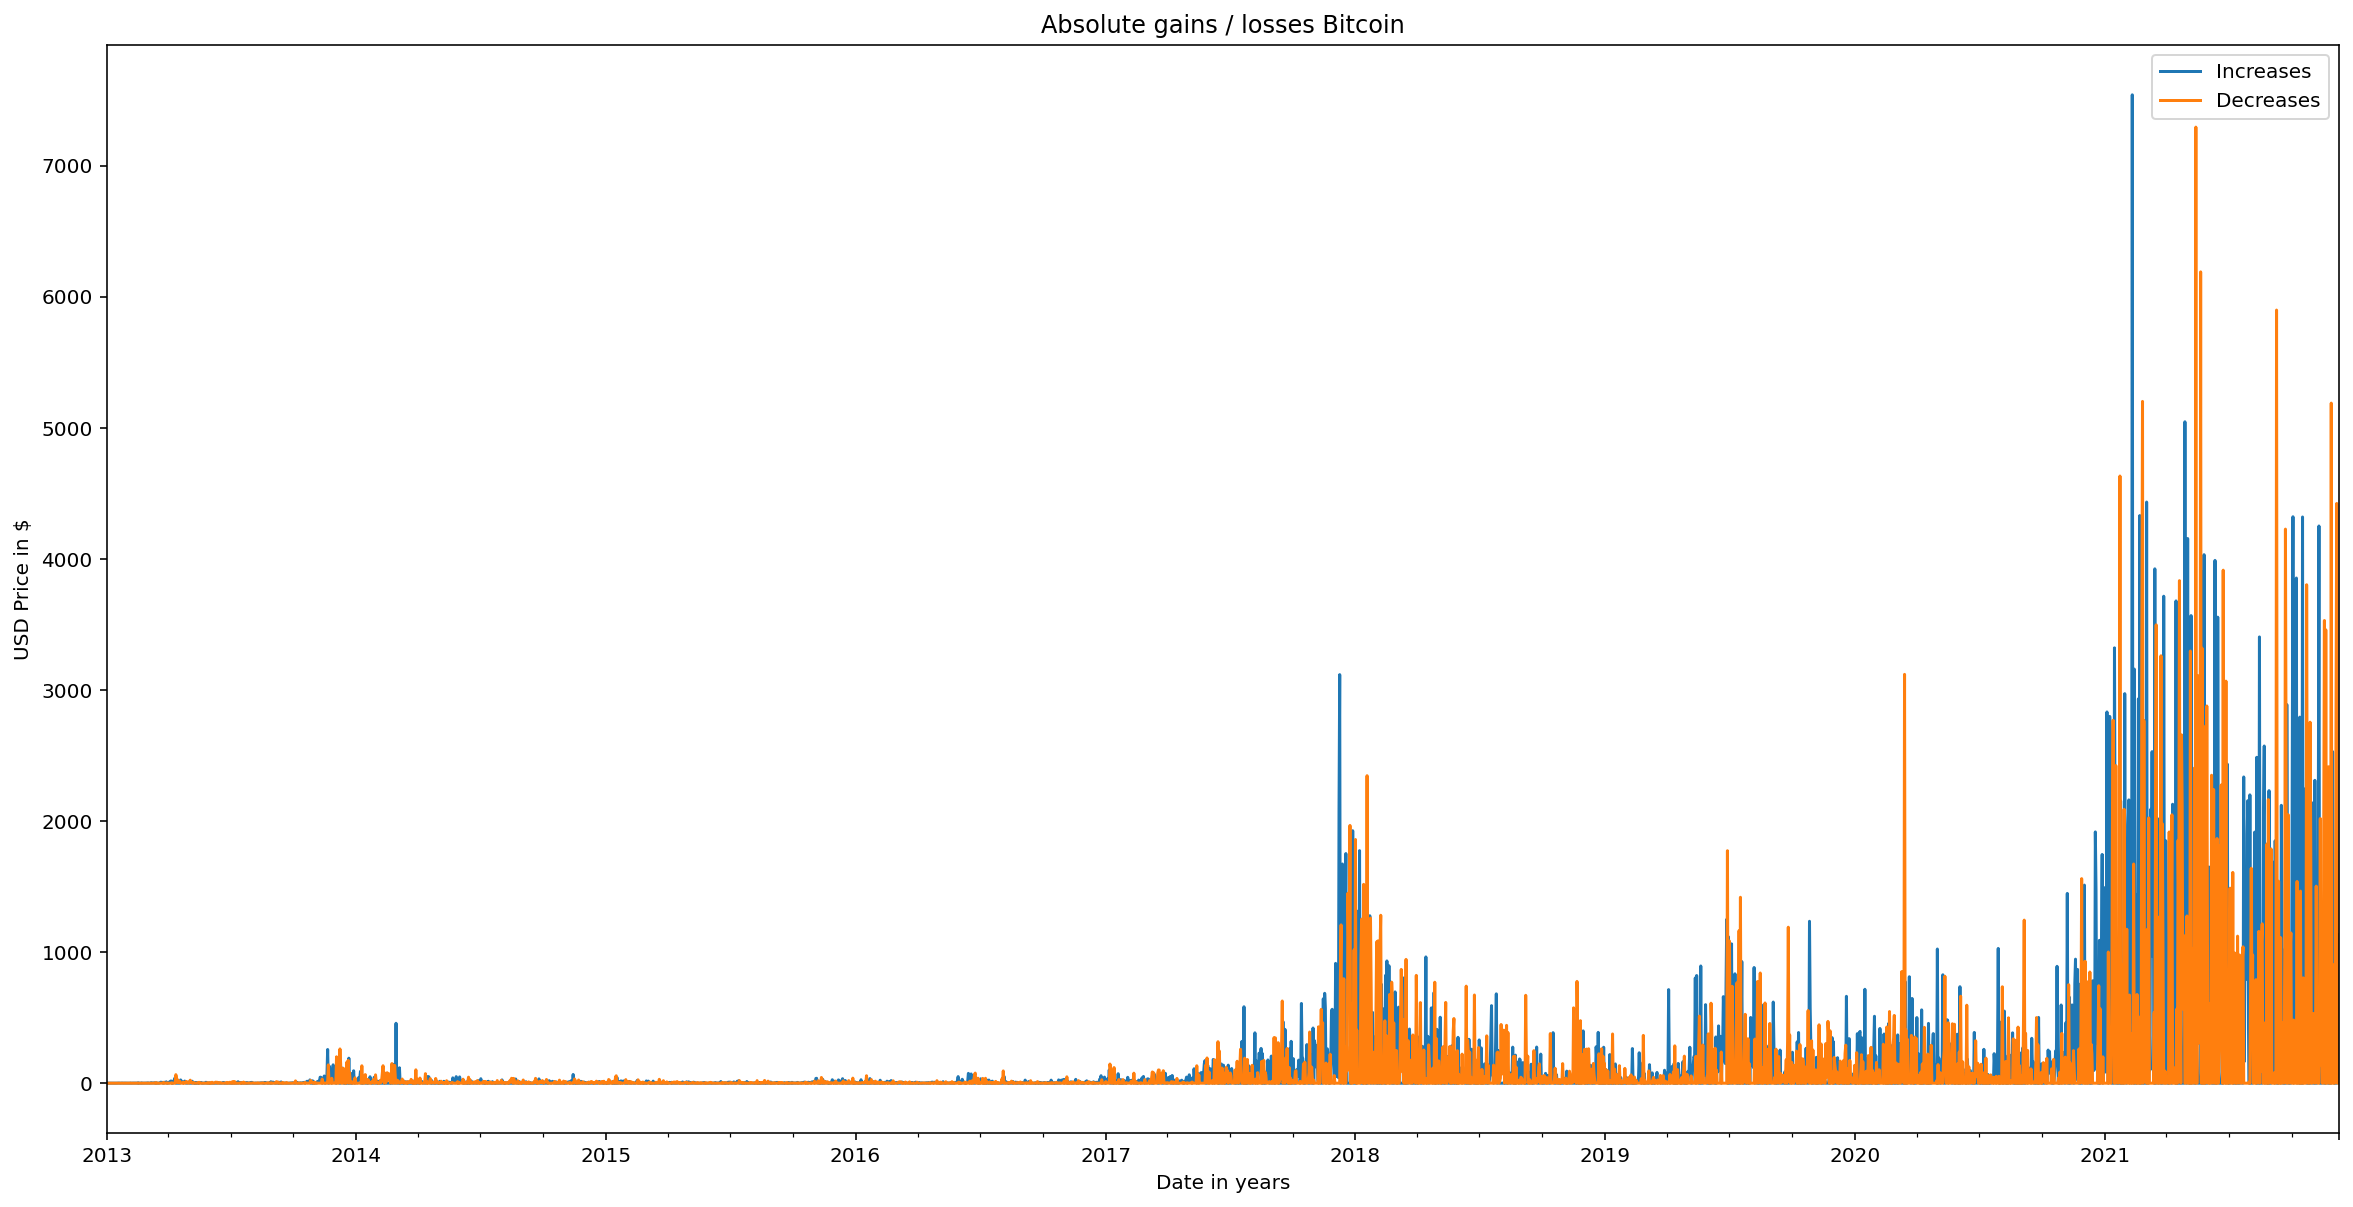

In [12]:
%config InlineBackend.figure_format ='retina'
increaseDecrease= ['Increases', 'Decreases']
sample_data[increaseDecrease].plot(figsize=(20,10))

plt.title('Absolute gains / losses Bitcoin') #title for the Chart
plt.ylabel('USD Price in $') # labeling the y axis of the given Chart
plt.xlabel('Date in years') # labeling the x axis of the given Chart
plt.show()

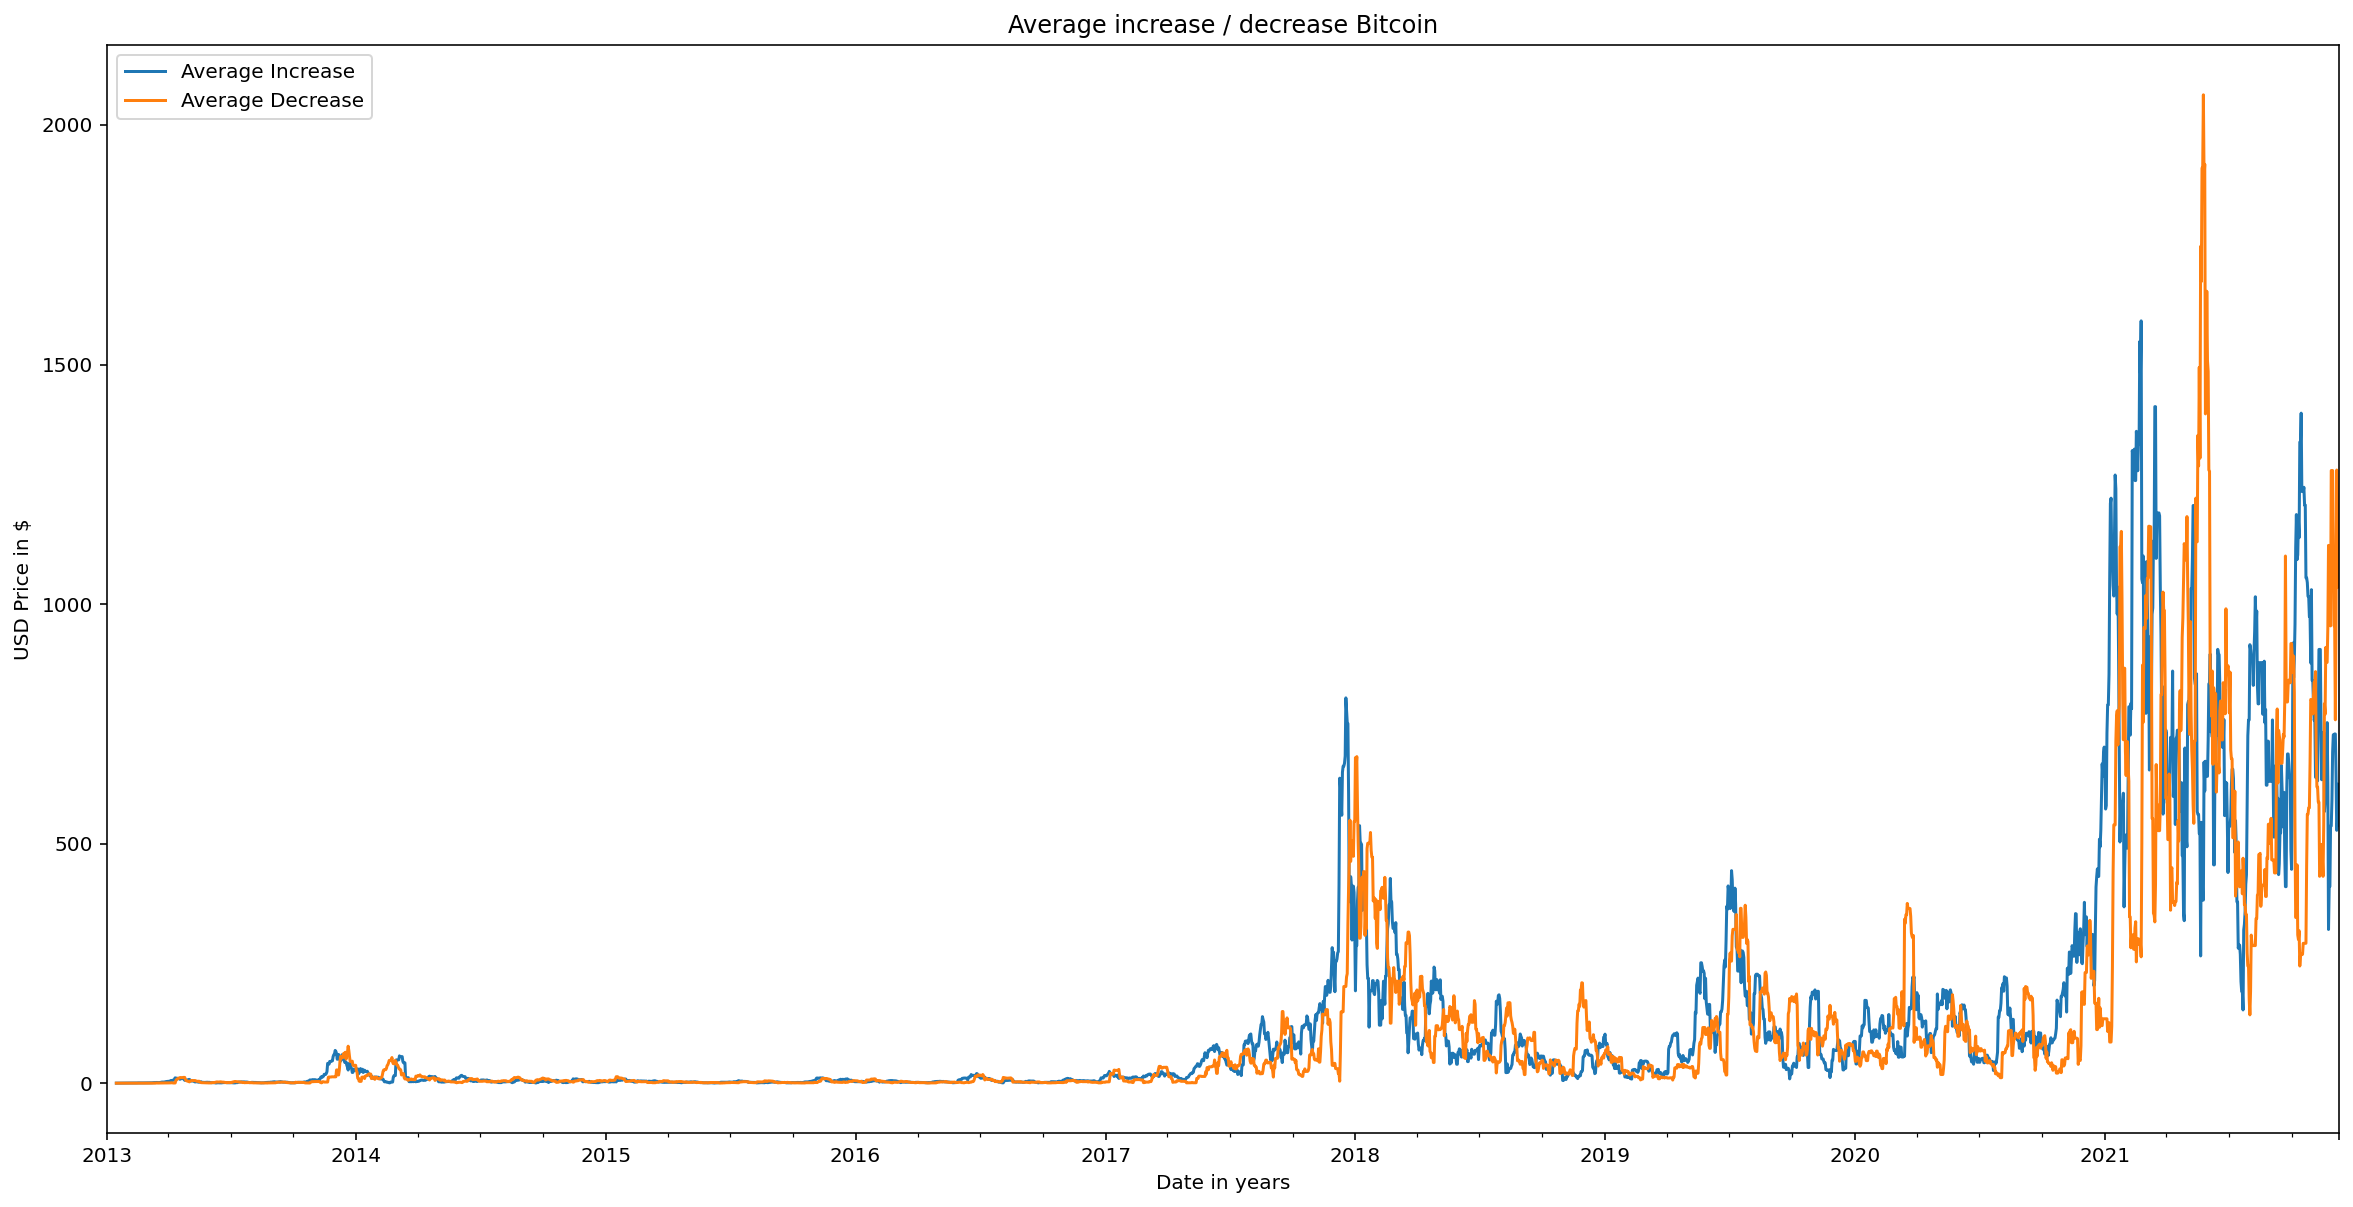

In [13]:
%config InlineBackend.figure_format ='retina'
avg_IncreaseDecrease= ['Average Increase', 'Average Decrease']
sample_data[avg_IncreaseDecrease].plot(figsize=(20,10))

plt.title('Average increase / decrease Bitcoin') 
plt.ylabel('USD Price in $')
plt.xlabel('Date in years')
plt.show()

In [14]:
# Wilder’s Moving Average
# period of 14 days

avgIncrease = avgIncrease[::-1]
avgDecrease = avgDecrease[::-1]

# Wilder’s Moving Average(funktioniert noch nicht)
#pd.Series(
#    data=[avgIncrease[:period].mean()],
#    index=[avgIncrease.index[period-1]],
#).append(
#    avgIncrease[period:]
#).ewm(
#    alpha=1.0 / period,
#    adjust=False,
#).mean()

# Wilder’s Moving Average Increase withoud 14 day period
exponentialAverageIncrease = avgIncrease.ewm(alpha=1.0 / period,adjust=False,).mean()
exponentialAverageIncrease = exponentialAverageIncrease[::-1]

# Wilder’s Moving Average Decrease withoud 14 day period
exponentialAverageDecrease = avgDecrease.ewm(alpha=1.0 / period,adjust=False,).mean()
exponentialAverageDecrease = exponentialAverageDecrease[::-1]

sample_data['Exponential Average Increase'] = exponentialAverageIncrease
sample_data['Exponential Average Decrease'] = exponentialAverageDecrease

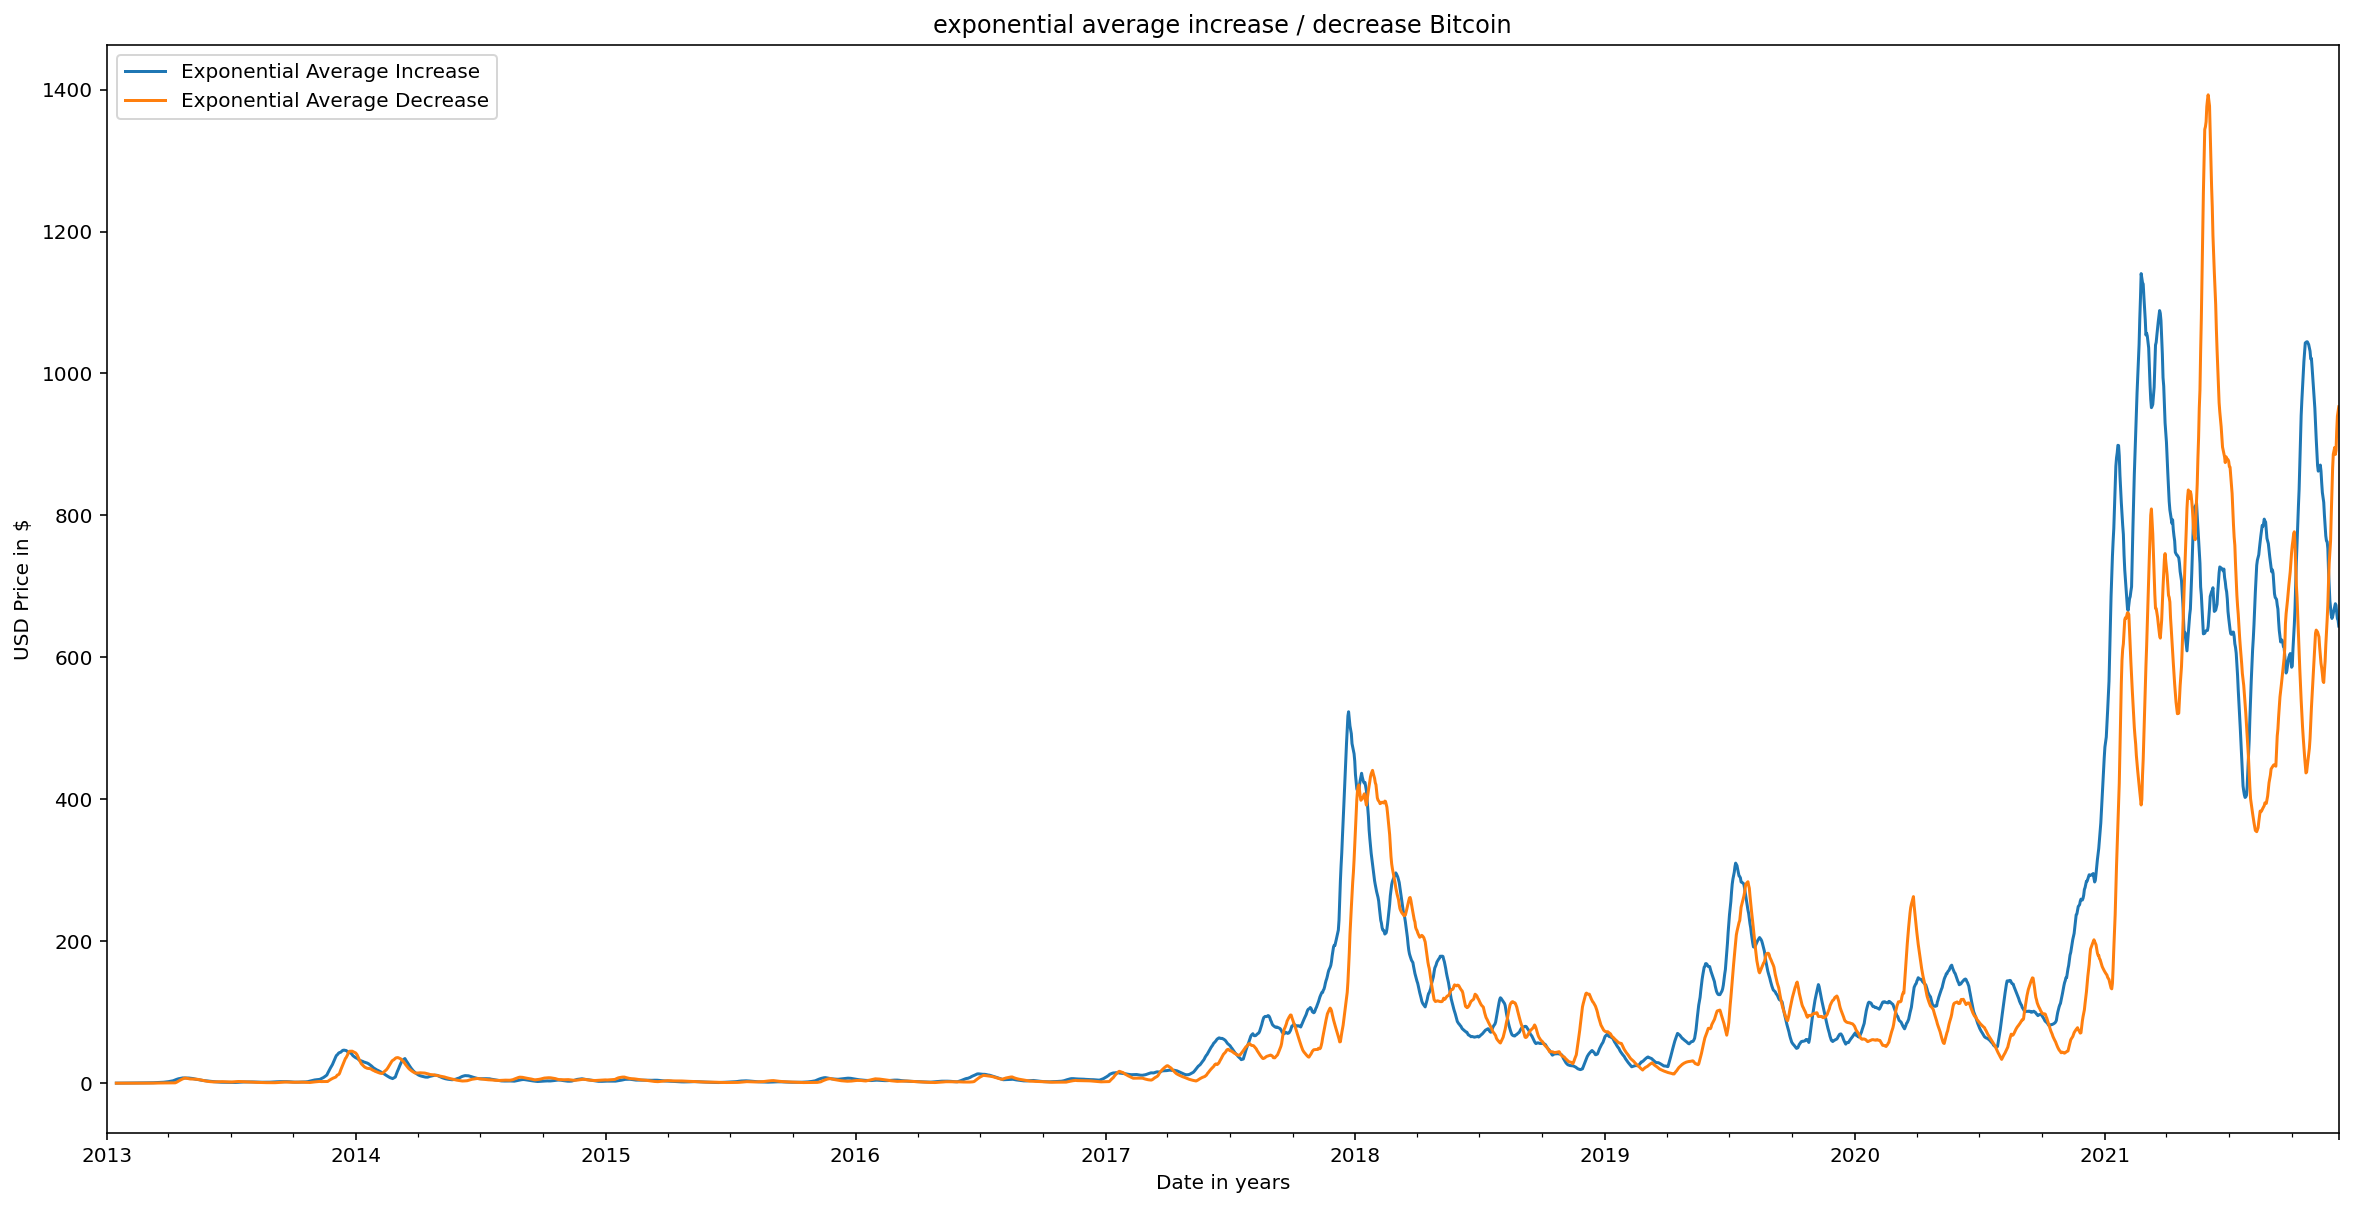

In [15]:
# Wilder's smoothed average increase / decrease Bitcoin
%config InlineBackend.figure_format ='retina'
exponentialIncreaseDecrease= ['Exponential Average Increase', 'Exponential Average Decrease']
sample_data[exponentialIncreaseDecrease].plot(figsize=(20,10))

plt.title('exponential average increase / decrease Bitcoin')
plt.ylabel('USD Price in $')
plt.xlabel('Date in years')
plt.show()

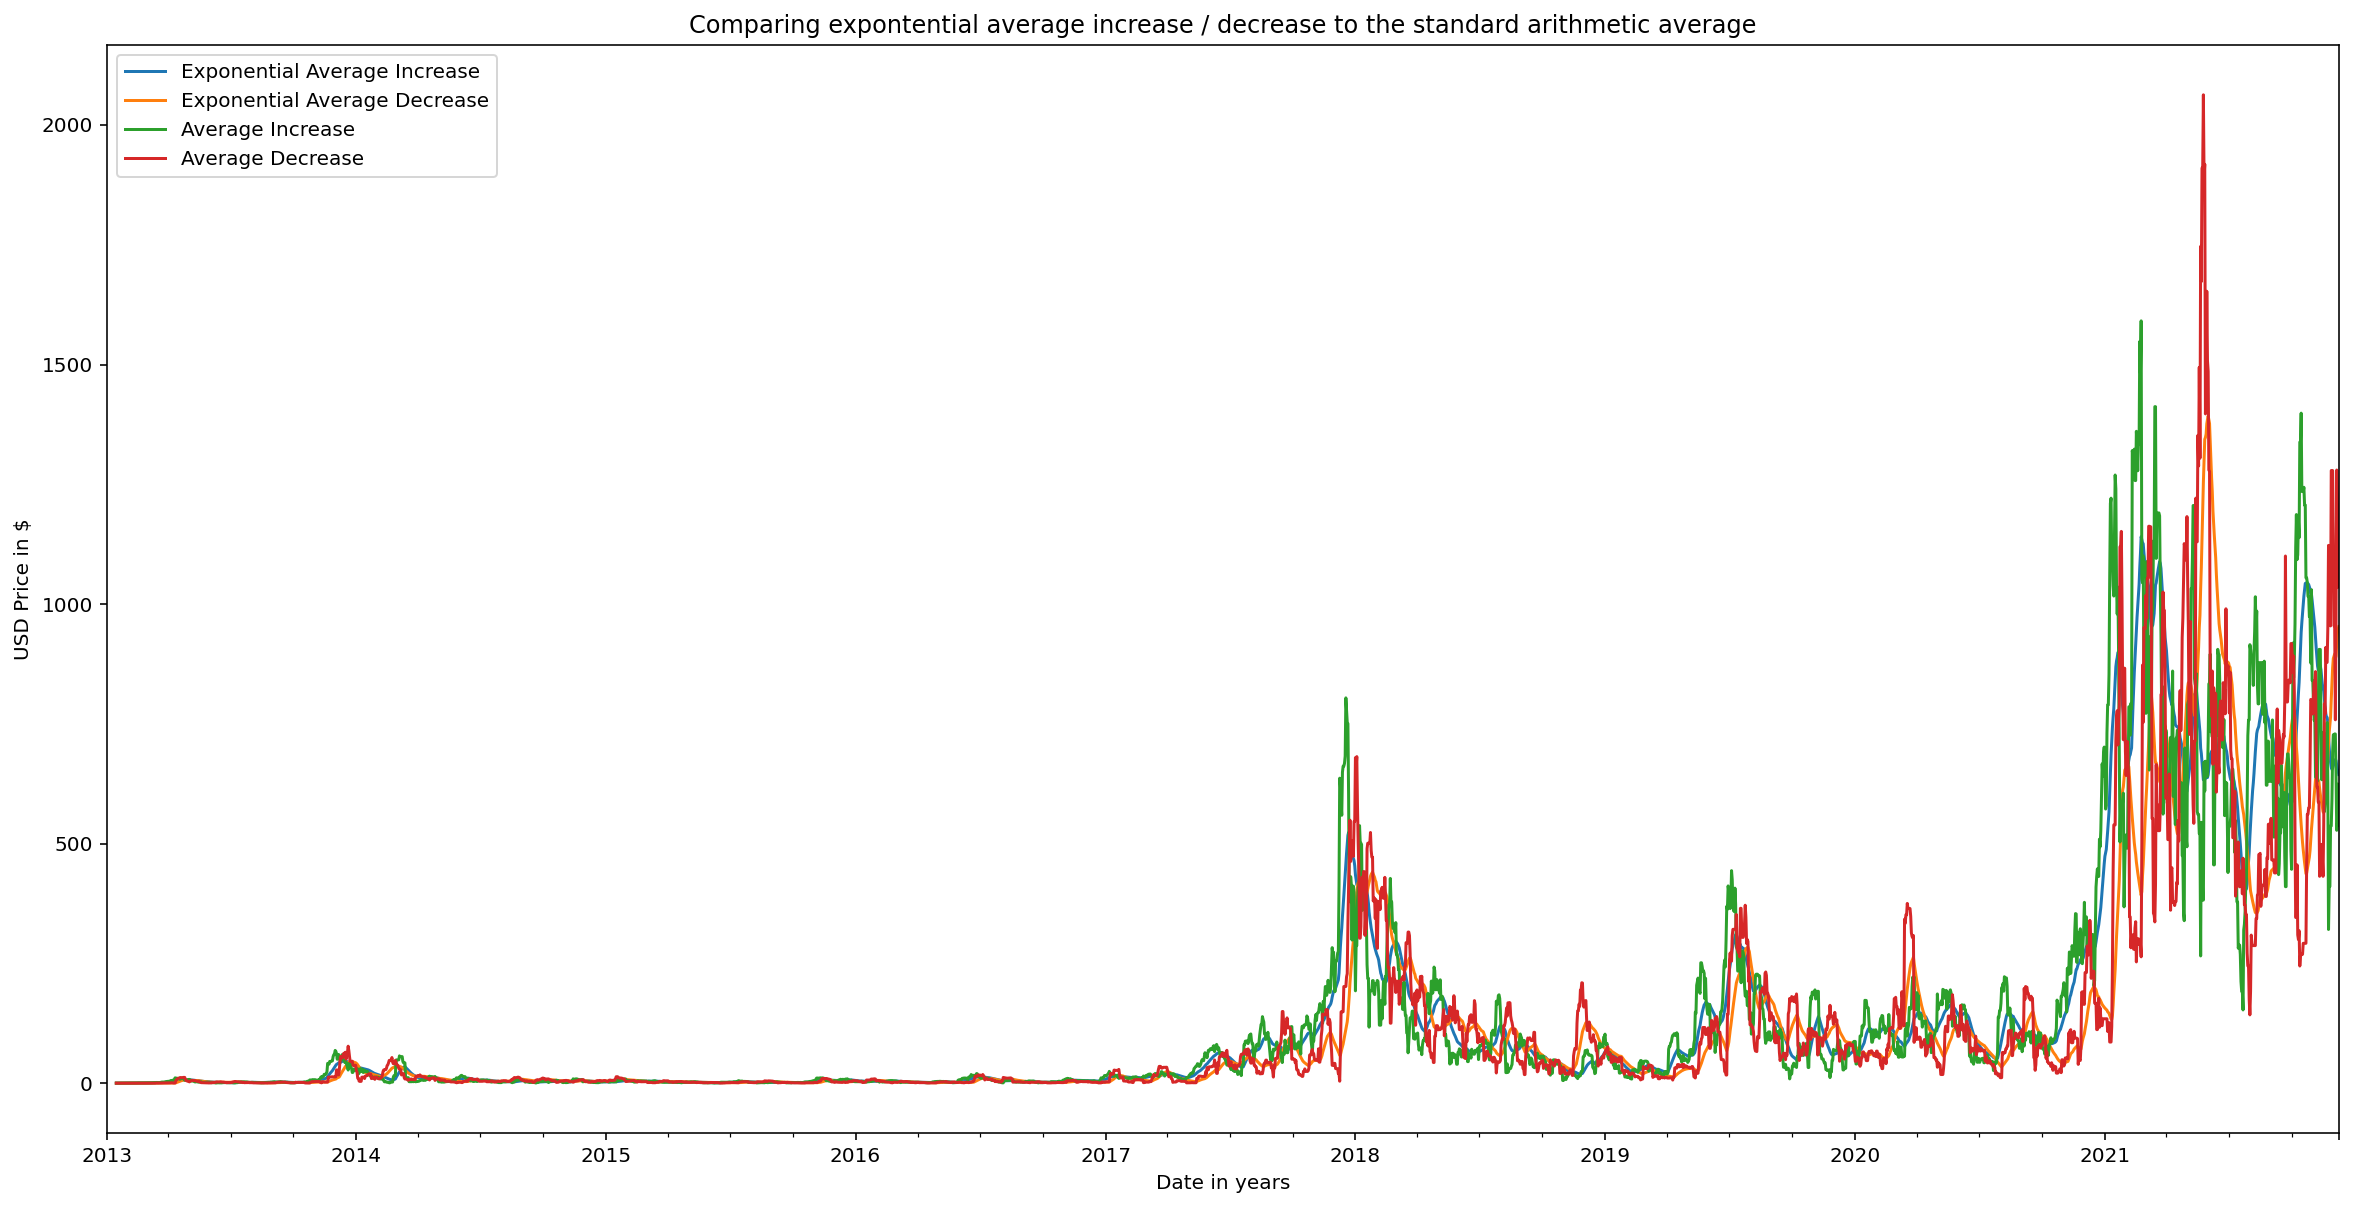

In [16]:
# Comparing Wilder’s Moving Average to the standard arithmetic average
%config InlineBackend.figure_format ='retina'
exponentialAverage_IncreaseDecrease= ['Exponential Average Increase', 'Exponential Average Decrease', 'Average Increase', 'Average Decrease']
sample_data[exponentialAverage_IncreaseDecrease].plot(figsize=(20,10))

plt.title('Comparing expontential average increase / decrease to the standard arithmetic average')
plt.ylabel('USD Price in $')
plt.xlabel('Date in years')
plt.show()

In [17]:
# RS Relative Strength 
rs = avgIncrease/avgDecrease

# RS exponential
rsw = exponentialAverageIncrease/exponentialAverageDecrease

sample_data['RS'] = rs
sample_data['ERS'] = rsw

# RSI Relative Strength Index
rsi = 100 - (100/(1+rs))

# RSI Wilder's
#rsiw = 100 - (100/(1+rsw))

# Wilder's automated
import pandas_ta as pta

rsiw = pta.rsi(sample_data['Close'][::-1], length = 14)

sample_data['RSI'] = rsi
sample_data['RSIW'] = rsiw
sample_data

,Date,Price,Open,High,Low,Vol.,Change %,Close,Increases,Decreases,Average Increase,Average Decrease,Exponential Average Increase,Exponential Average Decrease,RS,ERS,RSI,RSIW
2021-12-09,"Dec 09, 2021",47776.0,50477.6,50790.2,47525.4,53.58K,-5.35%,50596.6,49.2,0.0,538.178571,1035.521429,644.151840,953.030005,0.519717,0.675899,34.198295,35.735765
2021-12-08,"Dec 08, 2021",50473.9,50596.6,51204.7,48700.7,55.59K,-0.24%,50547.4,1135.3,0.0,624.278571,1035.521429,652.303630,946.684511,0.602864,0.689040,37.611674,35.584877
2021-12-07,"Dec 07, 2021",50595.2,50547.4,51918.6,50070.9,56.29K,0.07%,49412.1,215.7,0.0,543.185714,1208.014286,654.459404,939.850902,0.449652,0.696344,31.017914,32.172532
2021-12-06,"Dec 06, 2021",50562.1,49412.1,50913.3,47237.9,89.68K,2.34%,49196.4,0.0,4424.3,527.778571,1279.750000,663.018918,919.222949,0.412408,0.721282,29.198906,31.532645
2021-12-05,"Dec 05, 2021",49405.5,49196.4,49689.3,47797.8,72.03K,0.43%,53620.7,0.0,2874.5,645.150000,963.728571,673.422022,891.490099,0.669431,0.755389,40.099359,38.439597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,"Jan 05, 2013",13.4,13.5,13.6,13.3,21.33K,-0.44%,13.4,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,"Jan 04, 2013",13.5,13.4,13.5,13.3,29.64K,0.75%,13.3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,"Jan 03, 2013",13.4,13.3,13.5,13.3,18.03K,0.90%,13.3,0.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,"Jan 02, 2013",13.3,13.3,13.4,13.2,17.97K,0.00%,13.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


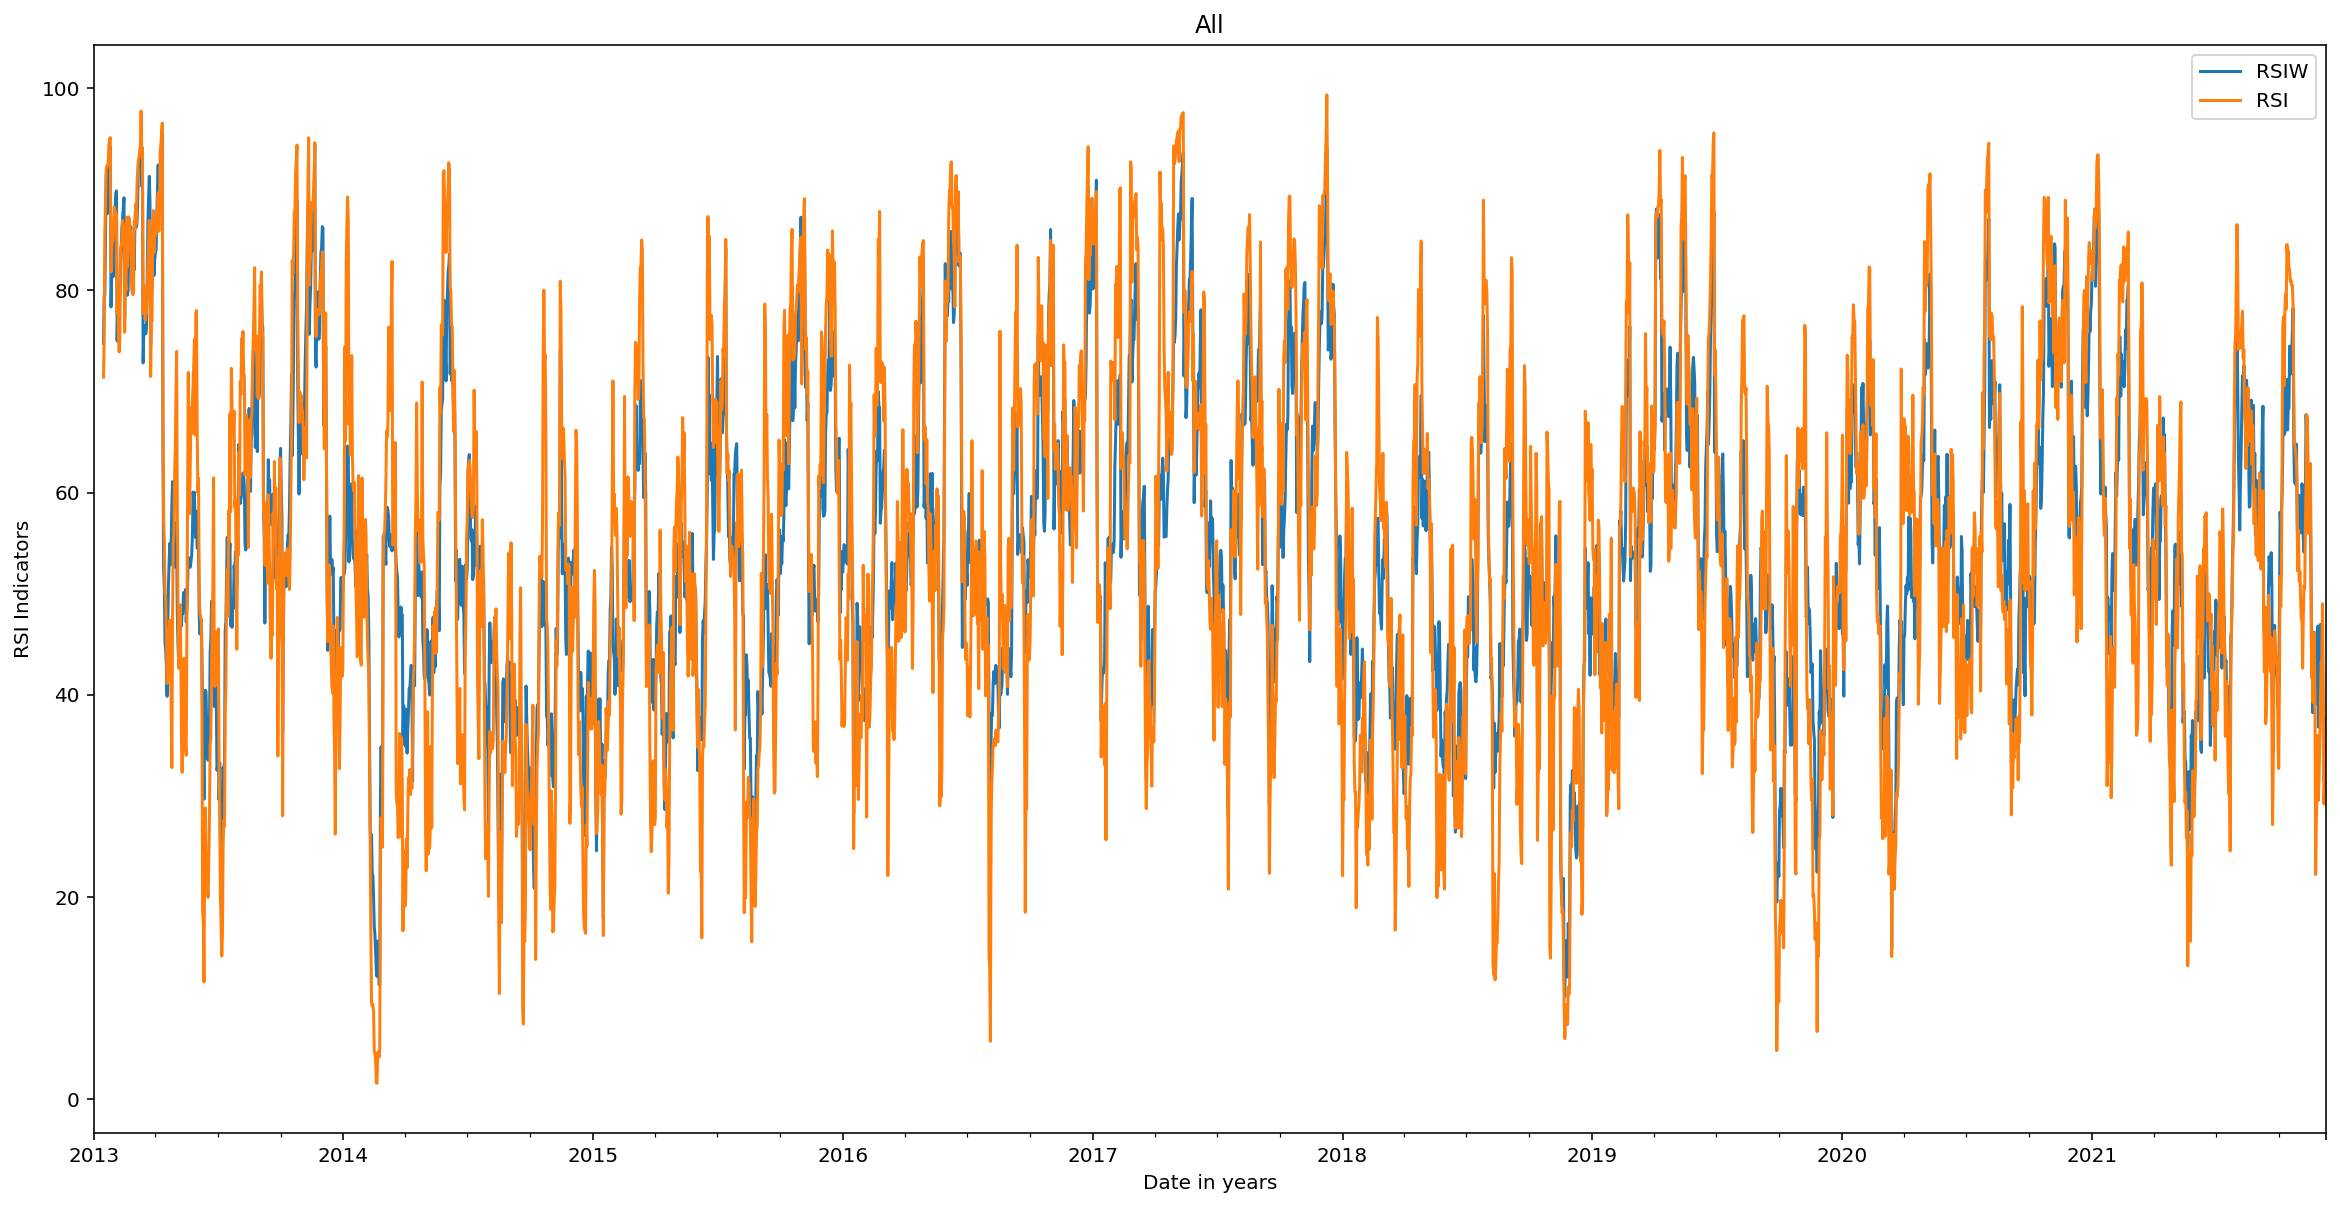

In [18]:
# RSI / Wilder's RSI
%config InlineBackend.figure_format ='retina'
wildersAverage_IncreaseDecrease= ['RSIW', 'RSI']
sample_data[wildersAverage_IncreaseDecrease].plot(figsize=(20,10))

plt.title('All')
plt.ylabel('RSI Indicators')
plt.xlabel('Date in years')
plt.show()

In [19]:
# buy sell algorithm
lowIndicator=30
highIndicator=70

buy = []
sell = []
open_pos = False

for i in range(len(sample_data)):
  if sample_data.RSI[i] < lowIndicator:
    if open_pos == False:
      buy.append(i)
      open_pos = True
  elif sample_data.RSI[i] > highIndicator:
    if open_pos:
      sell.append(i)
      open_pos = False

In [20]:
total = pd.concat([sample_data.iloc[buy].Price, sample_data.iloc[sell].Price], axis = 1)
total.columns = ['Buys', 'Sells']
total

,Buys,Sells
2013-05-31,NaN,128.8
2013-07-11,89.0,NaN
2013-09-05,NaN,130.2
2013-10-04,136.8,NaN
2013-12-06,NaN,845.0
...,...,...
2021-07-22,32298.9,NaN
2021-08-17,NaN,44691.6
2021-09-22,43551.6,NaN
2021-10-22,NaN,60690.3


In [21]:
totalProfit = total.shift(-1).Sells - total.Buys
totalProfit

2013-05-31        NaN
2013-07-11       41.2
2013-09-05        NaN
2013-10-04      708.2
2013-12-06        NaN
               ...   
2021-07-22    12392.7
2021-08-17        NaN
2021-09-22    17138.7
2021-10-22        NaN
2021-12-06        NaN
Length: 74, dtype: float64

In [22]:
# total win over time period
sells = pd.Series(total.shift(-1).Sells, name='Sells')
buys = pd.Series(total.Buys)
print("Total win: ", sells.sum()-buys.sum())

Total win:  66026.39999999994


In [23]:
print("max sell:", sells.max())
print("max buy:", buys.max())

max sell: 60690.3
max buy: 50562.1


In [24]:
totalprofit = total.shift(-1).Sells - total.Buys
totalprofit
number_of_losses = 0
for i in range(len(totalprofit)):
    if totalprofit[i] <= 0:
        number_of_losses+=1
    else:
        pass
number_of_winnings = len(totalprofit) - number_of_losses
print("total losing trades : ", number_of_losses)
print("total winning trades :", number_of_winnings) 
print("total number of trades: ", number_of_losses + number_of_winnings)
win_rate = number_of_winnings / len(totalprofit) *100 
print("our win-rate was equal to : ", win_rate, "%.") 

total losing trades :  3
total winning trades : 71
total number of trades:  74
our win-rate was equal to :  95.94594594594594 %.


In [25]:
relProfit = (total.shift(-1).Sells - total.Buys)/total.Buys
relProfit

2013-05-31         NaN
2013-07-11    0.462921
2013-09-05         NaN
2013-10-04    5.176901
2013-12-06         NaN
                ...   
2021-07-22    0.383688
2021-08-17         NaN
2021-09-22    0.393526
2021-10-22         NaN
2021-12-06         NaN
Length: 74, dtype: float64

In [26]:
# calculate the relative profit in %
relProfit.mean()
profitPercentageAvg = relProfit.mean() * 100
profitPercentageAvg

64.72080438010381

In [27]:
highest_winning = -1000
for i in range(len(relProfit)) : 
    if(relProfit[i] > highest_winning):
        highest_winning = relProfit[i]
print("highest percentage of winning from all the trades: ", highest_winning*100 , "%.")

highest percentage of winning from all the trades:  517.6900584795321 %.


In [28]:
highest_losing = 1000
for i in range(len(relProfit)) : 
    if(relProfit[i] < highest_losing):
        highest_losing = relProfit[i]
print("Biggest loss from our capital in all of the trades:" , highest_losing *100, "%." )

Biggest loss from our capital in all of the trades: -4.616167963079327 %.


In [29]:
capital = 100 
for i in range (len(relProfit)) : 
    if relProfit[i] < 0 : 
        print("Actual capital: ")
        capital = capital + capital*relProfit[i]
        print(capital)
    elif relProfit[i] > 0 : 
        print("Actual capital: ")
        capital = capital + capital*relProfit[i]
        print(capital)
    else:
        pass
end_capital = capital

print("end capital:", "{:,}".format(end_capital), "$.")

Actual capital: 
146.29213483146066
Actual capital: 
903.6319731914053
Actual capital: 
1283.0183816282276
Actual capital: 
1344.319343700993
Actual capital: 
1348.1467969353582
Actual capital: 
1781.3198770748008
Actual capital: 
1872.1311029568935
Actual capital: 
1841.5931612719457
Actual capital: 
2019.342720564061
Actual capital: 
2262.366566586512
Actual capital: 
2905.988434718202
Actual capital: 
3632.4855433977527
Actual capital: 
7117.128130324612
Actual capital: 
7833.444519120543
Actual capital: 
8529.497127520184
Actual capital: 
11292.358223522575
Actual capital: 
11928.990216635731
Actual capital: 
17430.29040392842
Actual capital: 
22390.57351697379
Actual capital: 
57991.05102773259
Actual capital: 
115294.76738463393
Actual capital: 
514414.1534816359
Actual capital: 
592878.6975735684
Actual capital: 
781620.0691746441
Actual capital: 
950246.9223172349
Actual capital: 
970341.9686122601
Actual capital: 
963747.6147911727
Actual capital: 
2645186.3440439207
Actual ca